#Q2

In [1]:
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [3]:
# Normalize data
x_train = x_train.astype(float) / 255.
x_test  = x_test.astype(float) / 255.

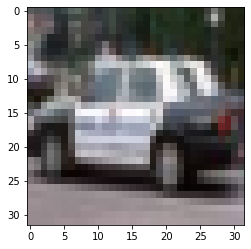

In [4]:
# Visualize data
plt.imshow(x_train[np.random.randint(len(x_train))])
plt.show()

In [5]:
# Convert class vectors to binary class matrices.
num_classes = 10
print("Y[0] before converting : " , y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("Y[0] after converting : " , y_train[0]) 

Y[0] before converting :  [6]
Y[0] after converting :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [6]:
# Fully connected model
fc_model = keras.Sequential()
fc_model.add(keras.layers.Input(shape=x_train[0].shape))
# Write your code here 
# Add Flatten layer and few Dense layers
fc_model.add(keras.layers.Flatten())
fc_model.add(keras.layers.Dense(1000, activation='relu'))
fc_model.add(keras.layers.Dense(10, activation='softmax'))
fc_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1000)              3073000   
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 3,083,010
Trainable params: 3,083,010
Non-trainable params: 0
_________________________________________________________________


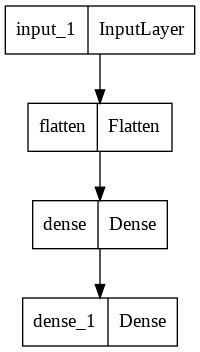

In [7]:
plot_model(fc_model)

In [8]:
Conv_model = keras.Sequential()
Conv_model.add(keras.layers.Input(shape=x_train[0].shape))
# write your code here
# add few Conv layers and Flatten layer
# you can use pool layers after Conv layers
Conv_model.add(keras.layers.Conv2D(16 ,(3,3), activation='relu'))
Conv_model.add(keras.layers.Conv2D(16 ,(3,3), activation='relu'))
Conv_model.add(keras.layers.MaxPooling2D())
Conv_model.add(keras.layers.Conv2D(32 ,(3,3), activation='relu', padding='same'))
Conv_model.add(keras.layers.Conv2D(32 ,(3,3), activation='relu', padding='same'))
Conv_model.add(keras.layers.MaxPooling2D())
Conv_model.add(keras.layers.Flatten())
Conv_model.add(keras.layers.Dense(1000, activation='relu'))
Conv_model.add(keras.layers.Dense(10, activation='softmax'))
Conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                  

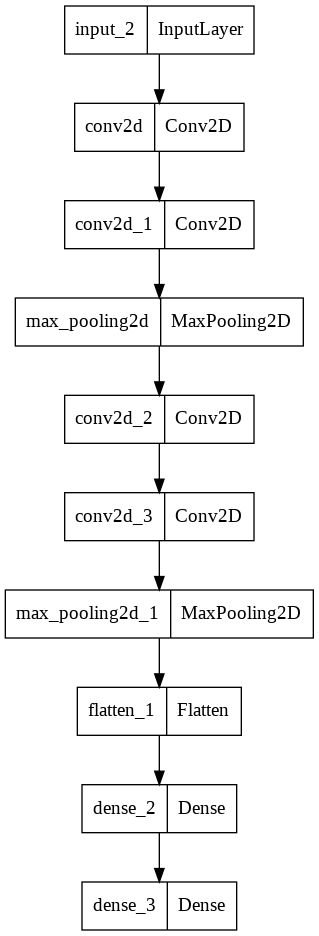

In [9]:
plot_model(Conv_model)

In [10]:
models_name = {}
models_name[0] = 'Fully Connected Model'
models_name[1] = 'Convolutional Model'

for i, model in enumerate([fc_model, Conv_model]):
    print(models_name[i])
    plot_model(model)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.Adam(learning_rate=2e-3),
        metrics=['accuracy'] 
    )   
    model.fit(x_train, y_train, epochs=5)
    print('\n')
    print('Loss and Accuracy on Test set : ')
    model.evaluate(x_test, y_test)
    print('\n')


Fully Connected Model
Epoch 1/5
1563/1563 [==============================] - 8s 3ms/step - loss: 1.9804 - accuracy: 0.3236
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7325 - accuracy: 0.3754
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6756 - accuracy: 0.3992
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6429 - accuracy: 0.4153
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6184 - accuracy: 0.4237


Loss and Accuracy on Test set : 
313/313 [==============================] - 1s 3ms/step - loss: 1.5977 - accuracy: 0.4269


Convolutional Model
Epoch 1/5
1563/1563 [==============================] - 14s 5ms/step - loss: 1.3832 - accuracy: 0.4982
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9734 - accuracy: 0.6569
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7728 - accuracy: 0.7302
Epoch 4/5
1563/1563 [==

#Q3

In [11]:
import tensorflow as tf
import cv2
import os 
import matplotlib.pyplot as plt

In [12]:
!rm -r sample_data

In [13]:
!gdown "1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t
To: /content/fruits-360-original-size.zip
100% 579M/579M [00:12<00:00, 46.4MB/s]


In [14]:
!unzip fruits-360-original-size.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r0_96.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r0_98.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_0.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_10.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_100.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_102.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_104.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_106.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_108.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_110.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_112.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_114.jpg  
  infl

## A : complete resize image

In [15]:
BASE_PATH = '/content/fruits-360-original-size/'

# path to the train folder
DATA_TRAIN_PATH = os.path.join(BASE_PATH, 'Training')

# path to the test folder 
DATA_TEST_PATH = os.path.join(BASE_PATH, 'Test')

In [16]:
import numpy as np

def resize_img(img, desired_size = 224):
    width, height, channels = img.shape
    if width>height:
      temp = int((width-height)/2)
      new_img = np.concatenate((np.zeros((width, temp, channels)).astype(np.uint8), 
                                img, 
                                np.zeros((width, width-height-temp, channels)).astype(np.uint8)), 
                               axis=1)
    elif height>width:
      temp = int((height-width)/2)
      new_img = np.concatenate((np.zeros((temp, height, channels)).astype(np.uint8), 
                                img,
                                np.zeros((height-width-temp, height, channels)).astype(np.uint8)),
                               axis=0)
    else:
      new_img = img
    new_img = cv2.resize(new_img, (desired_size, desired_size))
    return new_img

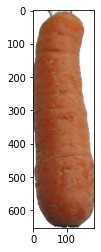

In [17]:
path = '/content/fruits-360-original-size/Training/carrot_1/r0_136.jpg'
img = cv2.imread(path)[:,:,::-1]
plt.imshow(img)
plt.show()

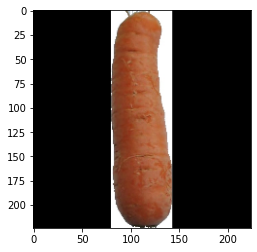

In [18]:
new_img = resize_img(img)
plt.imshow(new_img)

## Image Data generator

In [19]:
import tensorflow.keras.preprocessing.image as IM

train_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

test_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

train_generator  = train_datagen.flow_from_directory(DATA_TRAIN_PATH,batch_size=96,target_size=(224,224))
test_generator  = test_datagen.flow_from_directory(DATA_TEST_PATH,batch_size=96,target_size=(224,224))

Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


## B : Resnet50 with random weights

In [38]:
# YOU CAN CHANGE IT
EPOCHS = 3

In [39]:
from tensorflow.keras.applications.resnet50 import ResNet50

# Write your code here
base_model = ResNet50(weights=None, include_top=False, input_tensor=tf.keras.layers.Input(shape=(224,224,3)))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(24, activation='softmax')(x)

resnet = tf.keras.Model(inputs=base_model.input, outputs=predictions)
resnet.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_11[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [40]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [41]:
resnet.fit(train_generator, epochs=EPOCHS)

Epoch 1/3
65/65 [==============================] - 75s 964ms/step - loss: 1.8292 - acc: 0.5262
Epoch 2/3
65/65 [==============================] - 63s 958ms/step - loss: 0.3188 - acc: 0.8922
Epoch 3/3
65/65 [==============================] - 63s 965ms/step - loss: 0.2051 - acc: 0.9299


## C : Fine-tune Resnet50 on fruits dataset.

In [47]:
# write your code here 
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=tf.keras.layers.Input(shape=(224,224,3)))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(24, activation='softmax')(x)

fine_tune_resnet = tf.keras.Model(inputs=base_model.input, outputs=predictions)
for layer in fine_tune_resnet.layers[:-2]:
  layer.trainable = False

fine_tune_resnet.summary()


Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_15[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [49]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
fine_tune_resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [50]:
fine_tune_resnet.fit(train_generator, epochs=EPOCHS)

Epoch 1/3
65/65 [==============================] - 37s 528ms/step - loss: 2.7627 - acc: 0.2215
Epoch 2/3
65/65 [==============================] - 34s 524ms/step - loss: 1.8914 - acc: 0.5062
Epoch 3/3
65/65 [==============================] - 34s 524ms/step - loss: 1.3411 - acc: 0.6505


## Test models

In [51]:
resnet.evaluate(test_generator)

33/33 [==============================] - 19s 534ms/step - loss: 9.0497 - acc: 0.0974


[9.049718856811523, 0.09742765128612518]

In [52]:
fine_tune_resnet.evaluate(test_generator)

33/33 [==============================] - 18s 498ms/step - loss: 1.1146 - acc: 0.7502


[1.1145530939102173, 0.7501607537269592]